# Actionability Literature – Analyses Notebook
This notebook loads the generated CSVs and creates multiple analyses and plots.
- Overall analyses (excluding Process Mining)
- Process Mining deep dive
- Quotes & page markers
- Tidy CSV exports

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
papers = pd.read_csv('papers_actionability.csv')
papers['IsPM'] = papers['Domain'].astype(str).str.contains('Process Mining', case=False)
papers.head()

,Title,Year,Discipline/Domain,Subdomain/Topic,Eligible,Actionability Term Used,Need Without Definition,Contains Definition,Contains Features/Dimensions,Contains Framework/Model,...,How Understood,What Makes Actionable,How Achieved,Quotes_TermUsed,Quotes_NeedWODef,Quotes_WhatMakes,Quotes_Dimensions,Quotes_Supporting,Domain,IsPM
0,Integrated Exploration of Data-Intensive Busin...,2022,Computer Science / Business Process Management,Data-aware business process modeling and analysis,Not Eligible,No,No,No,No,Yes,...,N/A\n\n---,N/A\n\n---,N/A Š While operationalization is present for ...,[],[],[],[],[],Process Mining / BPM,True
1,Actionable Knowledge Discovery for Increasing ...,2019,Data Mining / Knowledge Discovery,Actionable Knowledge Discovery (AKD); Domain-D...,Eligible,Yes,No,Yes,Yes,Yes,...,fiActionable Knowledge reflects business needs...,- **Bidirectional significance (technical + bu...,- **Framework/Approach Name(s):** \n\n Two-way...,[],[],[('fiThis framework measures actionability fro...,[],[],Data Mining / AKD,False
2,A framework for analyzing the relationships be...,2022,Healthcare Management / Patient Experience,"Cancer patient satisfaction, nurse care, attit...",Eligible,NaN,NaN,Yes,Yes,Yes,...,Actionability is understood as producing fiact...,"- Identifiable, measurable service quality att...",NaN,[],[],[],[],[],Healthcare / Clinical,False
3,YarnSense: Automated Data Storytelling for Mul...,2024,Learning Analytics / Educational Technology,"Automated Data Storytelling, Multimodal Learni...",Eligible,NaN,NaN,Yes,Yes,Yes,...,Actionability is framed implicitly as the abil...,- Alignment with teacher™s pedagogical intenti...,- **Framework/Approach Name(s):** YarnSense Ar...,[],[],[],[],[],Education / Learning,False
4,Why-Not Explainable Graph Recommender,2024,Computer Science / Artificial Intelligence,"Explainable Recommender Systems, Counterfactua...",Eligible,NaN,NaN,Yes,Yes,Yes,...,Actionability is framed as providing explanati...,- Directly modifiable by the user (edges roote...,- **Framework/Approach Name(s):** EMiGRe (Expl...,[],[],[],[],[],Explainable AI / ML,False


/var/folders/gx/8kpsm061237f1s5818mm_b5w0000gn/T/ipykernel_20547/954080399.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.figure(); avg_op.plot(kind='bar'); plt.title('Avg Operationalization by Domain (excl. PM)'); plt.tight_layout(); plt.show()


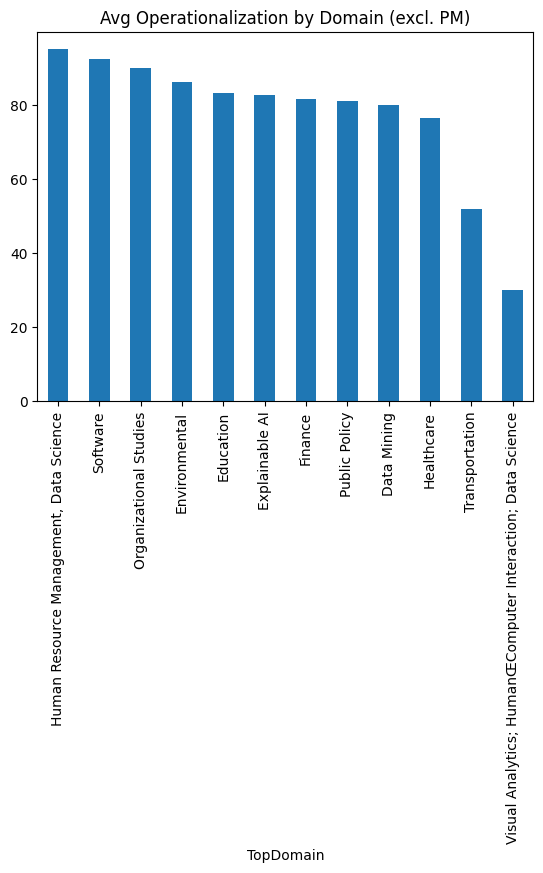

/var/folders/gx/8kpsm061237f1s5818mm_b5w0000gn/T/ipykernel_20547/954080399.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.figure(); def_counts.plot(kind='bar'); plt.title('Explicit Definitions by Domain (excl. PM)'); plt.tight_layout(); plt.show()


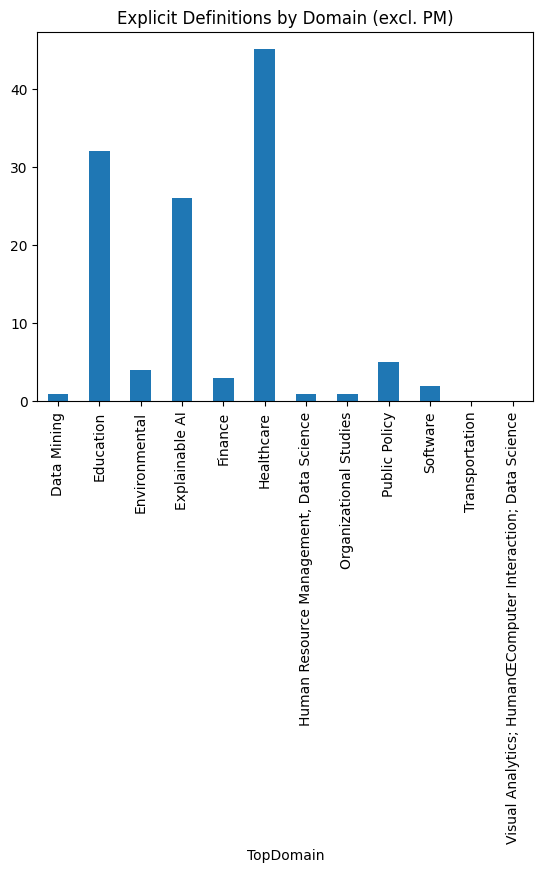

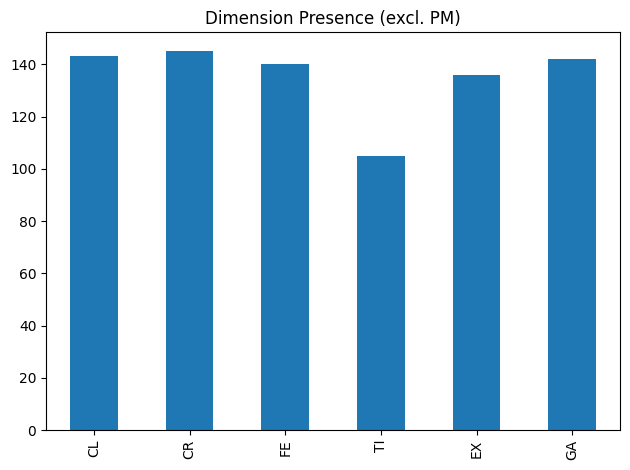

In [2]:
# Overall excl. PM
gen = papers[~papers['IsPM']].copy()
gen['TopDomain'] = gen['Domain'].str.split('/').str[0].str.strip()
avg_op = gen.groupby('TopDomain')['Operationalization Score'].mean().sort_values(ascending=False)
plt.figure(); avg_op.plot(kind='bar'); plt.title('Avg Operationalization by Domain (excl. PM)'); plt.tight_layout(); plt.show()
def_counts = gen.groupby('TopDomain')['Contains Definition'].apply(lambda s: (s=='Yes').sum());
plt.figure(); def_counts.plot(kind='bar'); plt.title('Explicit Definitions by Domain (excl. PM)'); plt.tight_layout(); plt.show()
dims=['CL','CR','FE','TI','EX','GA'];
dim_counts = gen[dims].apply(lambda c: c.fillna(False).astype(bool).sum());
plt.figure(); dim_counts.plot(kind='bar'); plt.title('Dimension Presence (excl. PM)'); plt.tight_layout(); plt.show()

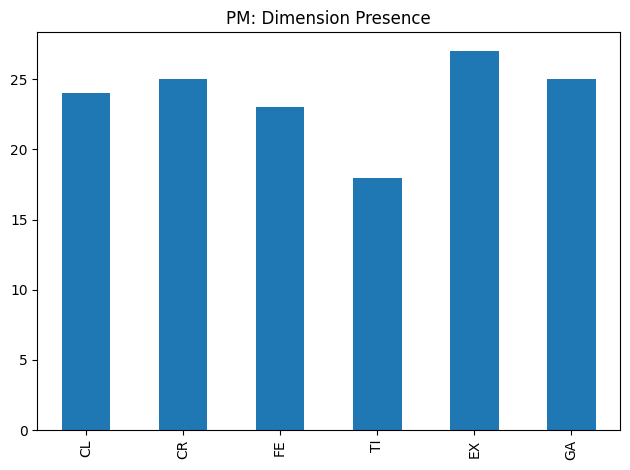

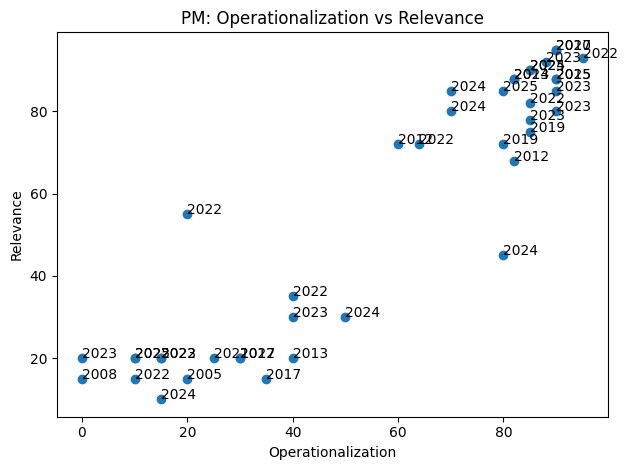

In [3]:
# PM deep dive
pm = papers[papers['IsPM']].copy()
if not pm.empty:
    dims=['CL','CR','FE','TI','EX','GA'];
    pm_counts = pm[dims].apply(lambda c: c.fillna(False).astype(bool).sum());
    plt.figure(); pm_counts.plot(kind='bar'); plt.title('PM: Dimension Presence'); plt.tight_layout(); plt.show()
    plt.figure(); plt.scatter(pm['Operationalization Score'], pm['Overall Relevance Score']);
    for i,r in pm.iterrows(): plt.annotate(str(r['Year']), (r['Operationalization Score'], r['Overall Relevance Score']));
    plt.title('PM: Operationalization vs Relevance'); plt.xlabel('Operationalization'); plt.ylabel('Relevance'); plt.tight_layout(); plt.show()

In [5]:
# Tidy dimensions long CSV
dims=['CL','CR','FE','TI','EX','GA']
dim_long = papers.melt(id_vars=['Title','Year','Domain','IsPM'], value_vars=dims, var_name='Dimension', value_name='Present')
dim_long['Present']=dim_long['Present'].fillna(False).astype(bool)
dim_long.to_csv('tidy_dimensions_long.csv', index=False)
dim_long.head()

,Title,Year,Domain,IsPM,Dimension,Present
0,Integrated Exploration of Data-Intensive Busin...,2022,Process Mining / BPM,True,CL,False
1,Actionable Knowledge Discovery for Increasing ...,2019,Data Mining / AKD,False,CL,True
2,A framework for analyzing the relationships be...,2022,Healthcare / Clinical,False,CL,True
3,YarnSense: Automated Data Storytelling for Mul...,2024,Education / Learning,False,CL,True
4,Why-Not Explainable Graph Recommender,2024,Explainable AI / ML,False,CL,True
